# Setup

In [1]:
cd("..")

# Packages

In [2]:
include("../src/Utils.jl")
using .Utils

In [3]:
using Pipe
using Query
using VegaLite
using DataFrames
using Turing
using StatsPlots

# Data

In [4]:
n = 1000

h = rand(Uniform(0, 100), n)
w = exp.(5 .+ 2 .* h) .+ rand(Normal(0, 1), n);

# Chain

This model converges very fast:

In [9]:
@model function model1(height, weight)
    N = length(height)
    
    α ~ Normal(0, 10)
    β ~ Normal(0, 10)
    
    for i in 1:N
       μᵢ = α + β * height[i]
       weight[i] ~ LogNormal(μᵢ, 1)
    end
end


c1 = sample(model1(h, w), NUTS(), 1000)
c1

┌ Info: Found initial step size
│   ϵ = 0.00078125
└ @ Turing.Inference /home/user/.julia/packages/Turing/G7n2S/src/inference/hmc.jl:625
Sampling: 100%|█████████████████████████████████████████| Time: 0:02:13


Chains MCMC chain (500×14×1 Array{Float64,3}):

Iterations        = 1:500
Thinning interval = 1
Chains            = 1
Samples per chain = 500
parameters        = α, β
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat  
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64  
                                                                            
           α    5.0140    0.0632     0.0028    0.0066    84.3985    1.0235  
           β    1.9998    0.0011     0.0000    0.0001   103.0197    1.0301  

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5%  
      Symbol   Float64   Float64   Float64   Float64   Float64  
                                                                
           α    4.

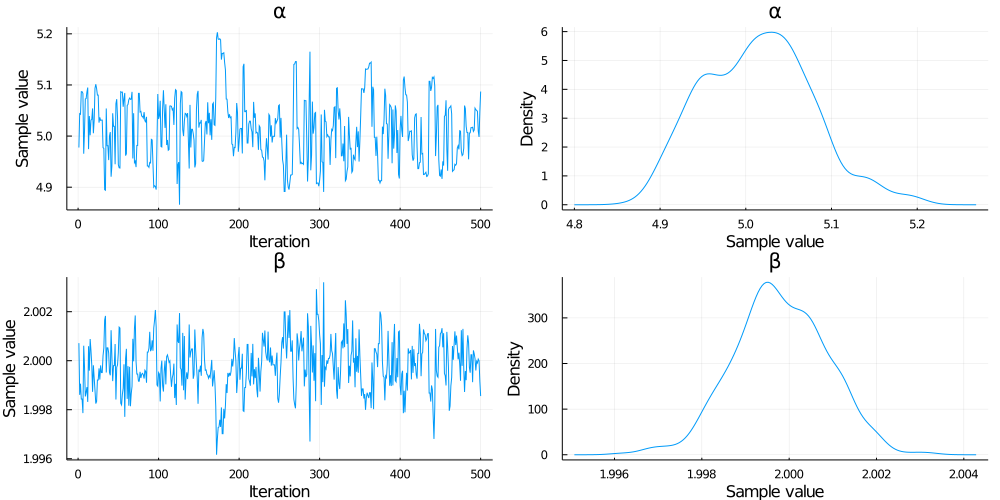

In [10]:
plot(c1)

This model is very hard to converge and throws alot of numerical errors:

In [11]:
@model function model2(height, weight)
    N = length(height)
    
    σ ~ Exponential(1)
    α ~ Normal(0, 10)
    β ~ Normal(0, 10)
    
    for i in 1:N
       μᵢ = α + β * height[i]
       weight[i] ~ LogNormal(μᵢ, σ)
    end
end


c2 = sample(model2(h, w), NUTS(), 1000)
c2

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/user/.julia/packages/AdvancedHMC/P9wqk/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/user/.julia/packages/AdvancedHMC/P9wqk/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/user/.julia/packages/AdvancedHMC/P9wqk/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/user/.julia/packages/AdvancedHMC/P9wqk/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, fa

Chains MCMC chain (500×15×1 Array{Float64,3}):

Iterations        = 1:500
Thinning interval = 1
Chains            = 1
Samples per chain = 500
parameters        = α, β, σ
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth

Summary Statistics
  parameters      mean       std   naive_se      mcse       ess      rhat  
      Symbol   Float64   Float64    Float64   Float64   Float64   Float64  
                                                                           
           α    5.0000    0.0000     0.0000    0.0000    2.4406    1.3190  
           β    2.0000    0.0000     0.0000    0.0000   25.4092    1.0736  
           σ    0.0011    0.0000     0.0000    0.0000    3.3592    1.1943  

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5%  
      Symbol   Float64   Float64   Float64   Float64   Float64  
         

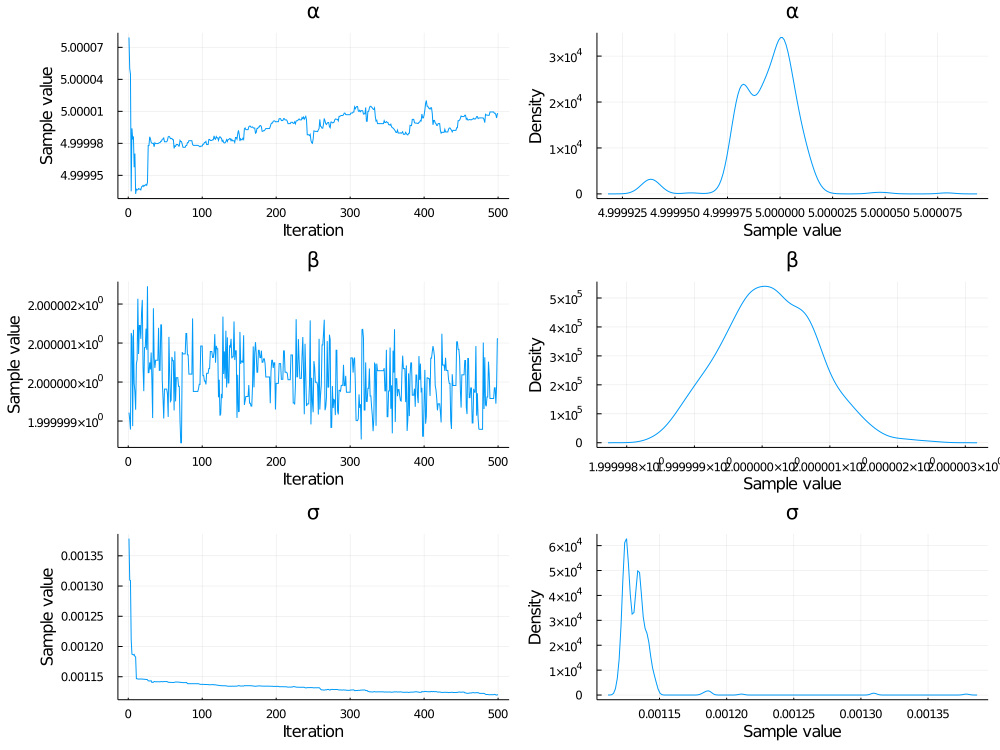

In [12]:
plot(c2)

How to set the prior of $\sigma$ so that chain converges to the correct answer quickly?